Text(0.5, 1.0, 'YOLOv5 Xlarge')

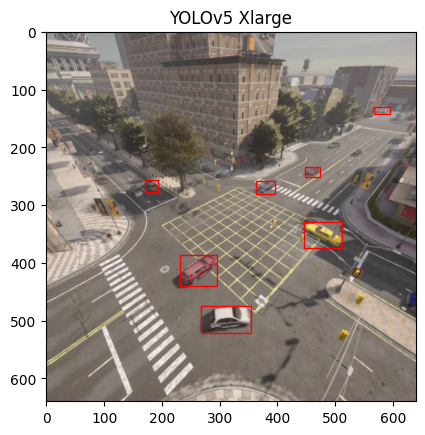

In [5]:
# Visualize specific timestep as separate graphs with all
from utils.visualizations import draw_car_views
import os
from visualize import read_data
import matplotlib.pyplot as plt
from data import DataLoader

TIMESTEP = 100
CAR_INDEX = [7]
CARLA_ENVIRONMENT = "intersection_15_vehicles.hdf5"
"""
    "nano-intersection_15_vehicles.hdf5-rsu_used_True-1681136563",
    "small-intersection_15_vehicles.hdf5-rsu_used_True-1681137009",
    "medium-intersection_15_vehicles.hdf5-rsu_used_True-1681137610",
    "large-intersection_15_vehicles.hdf5-rsu_used_True-1681138523",
    "xlarge-intersection_15_vehicles.hdf5-rsu_used_True-1681139813"
"""
RUN_FOLDER = "xlarge-intersection_15_vehicles.hdf5-rsu_used_True-1681139813"
MODEL_NAME = RUN_FOLDER.split('-')[0].capitalize()

results_path = os.path.join("results", RUN_FOLDER)
simulation_results_path = os.path.join(results_path, "results.json")
yolo_results_path = os.path.join(results_path, "yolo_results.json")

data_results, data_yolo = read_data(simulation_results_path, yolo_results_path)

dataloader = DataLoader(CARLA_ENVIRONMENT)
agents = dataloader.get_entity_ids()

fig, ax = plt.subplots()

#fig.set_size_inches(18.5, 10.5)
draw_car_views(CAR_INDEX, None, ax, agents, data_results,
                       data_yolo, TIMESTEP, dataloader, draw_caption=False)

ax.set_title(f"YOLOv5 {MODEL_NAME}")

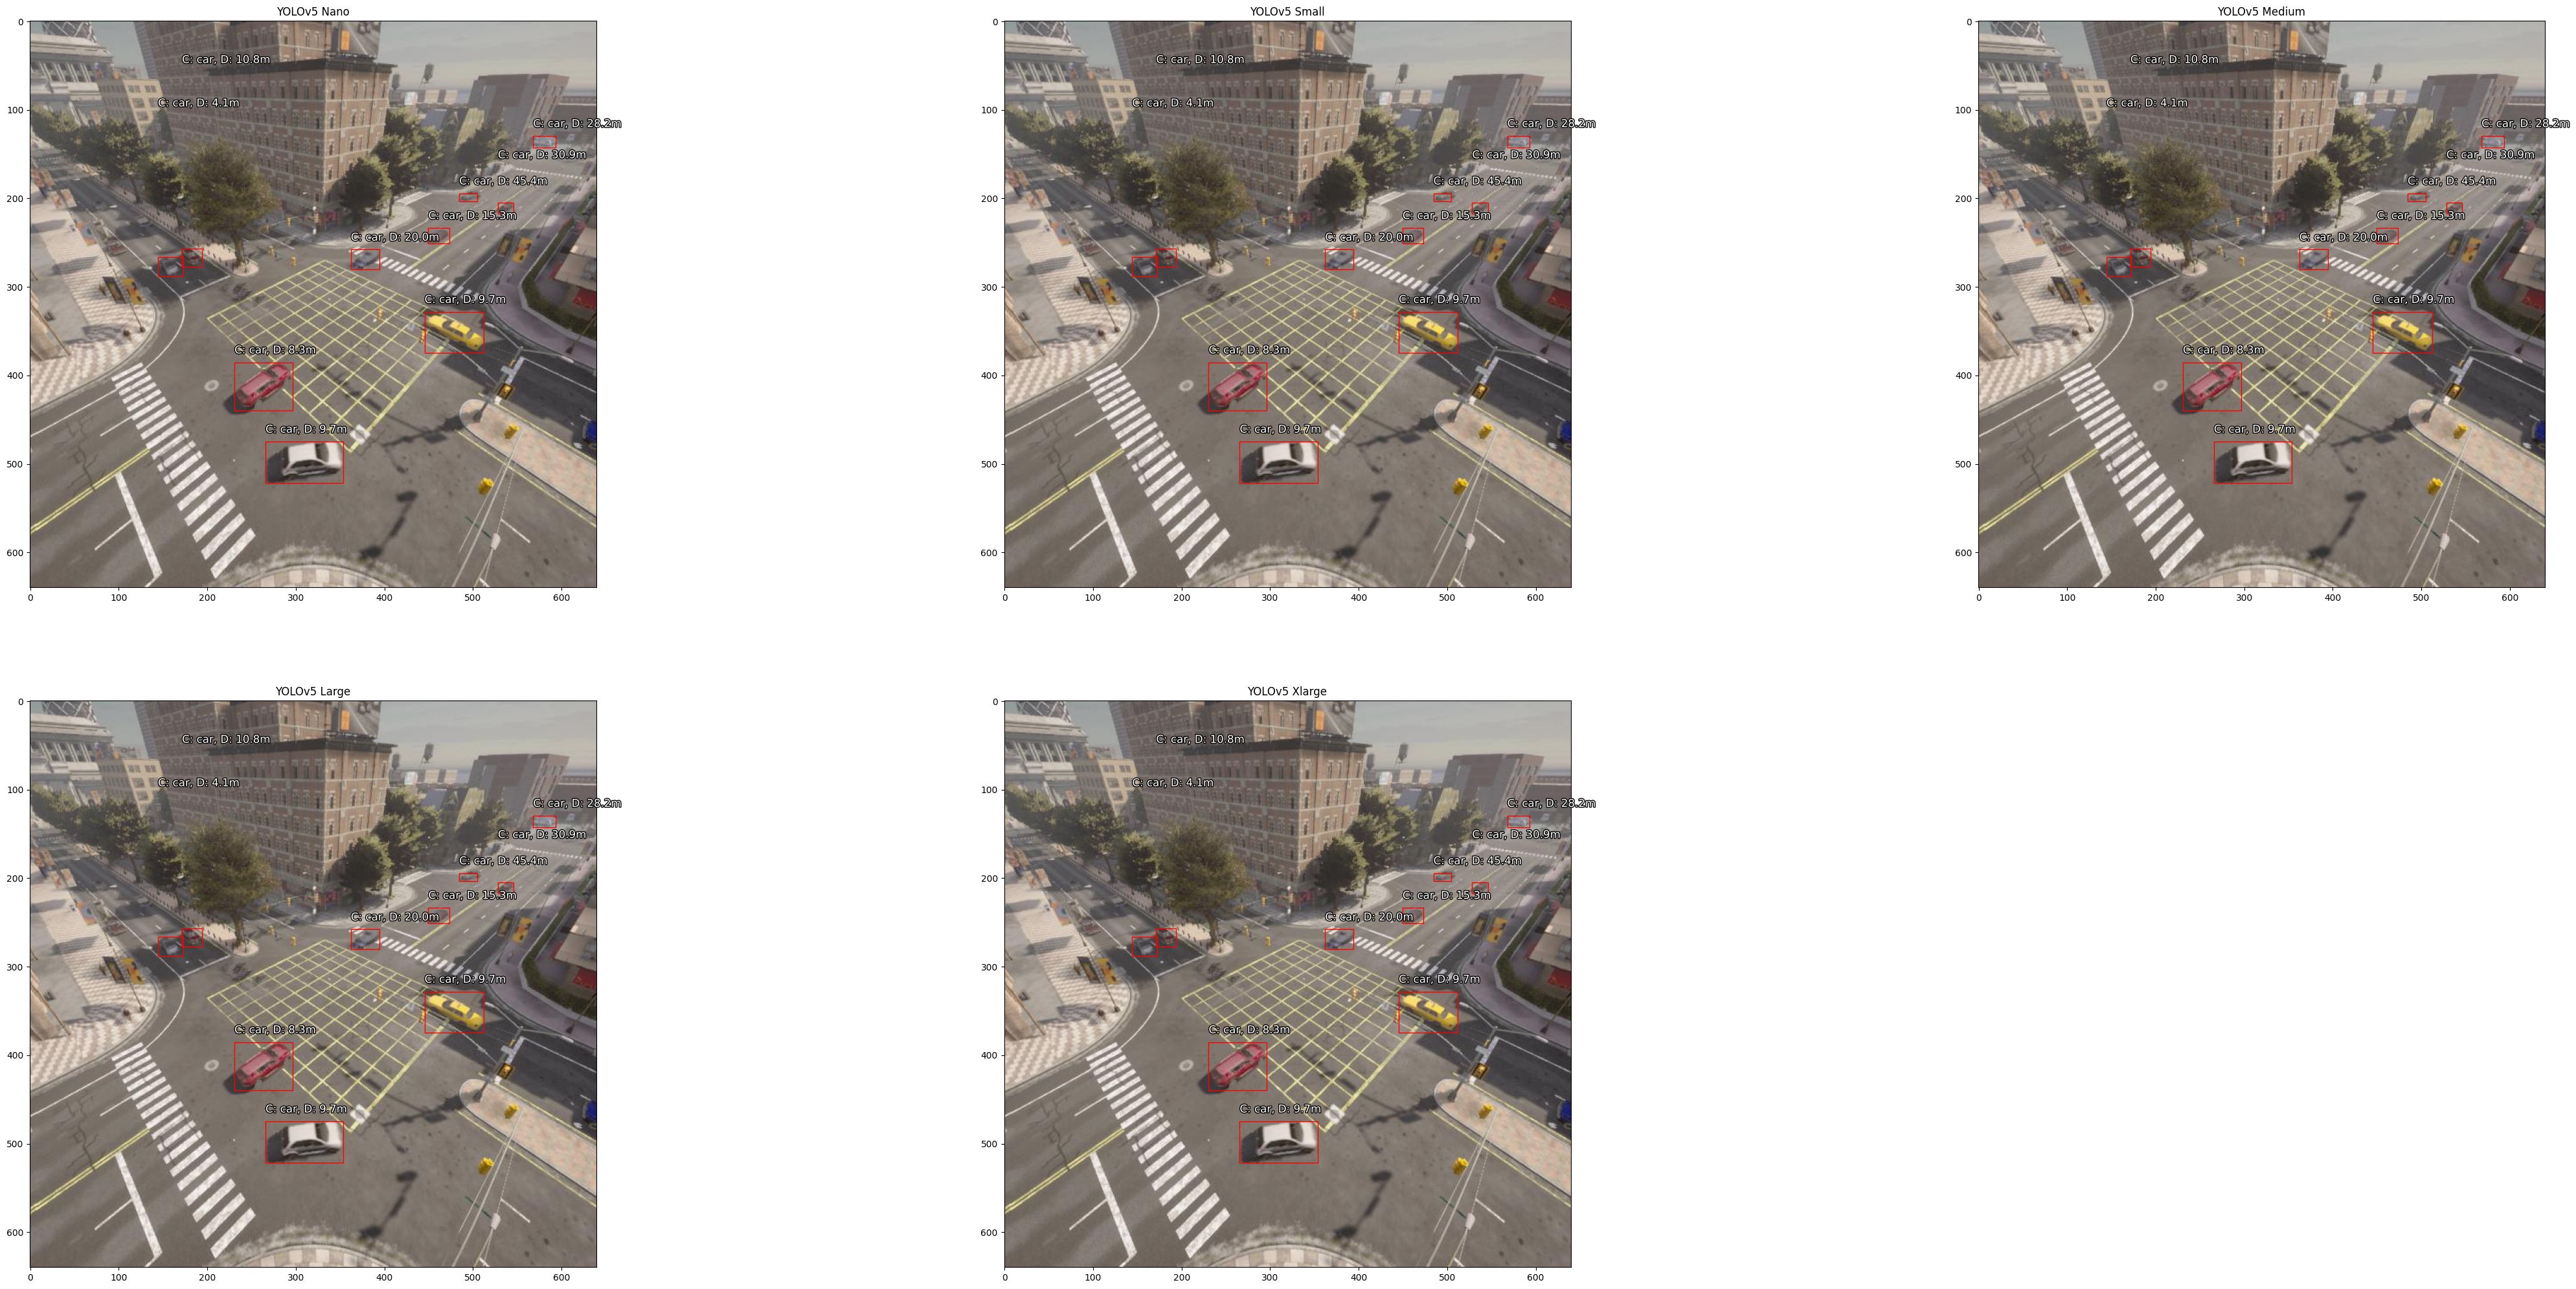

In [49]:
# Visualize specific timestep from specific car POV for ALL models
TIMESTEP = 100
CAR_INDEX = [7]
CARLA_ENVIRONMENT = "intersection_15_vehicles.hdf5"
RUN_FOLDERS = [
    "nano-intersection_15_vehicles.hdf5-rsu_used_True-1681136563",
    "small-intersection_15_vehicles.hdf5-rsu_used_True-1681137009",
    "medium-intersection_15_vehicles.hdf5-rsu_used_True-1681137610",
    "large-intersection_15_vehicles.hdf5-rsu_used_True-1681138523",
    "xlarge-intersection_15_vehicles.hdf5-rsu_used_True-1681139813"
]

dataloader = DataLoader(CARLA_ENVIRONMENT)
agents = dataloader.get_entity_ids()
fig_summary, axes_summary = plt.subplot_mosaic(
            [["top left", "top centre", "top right"],
            ["bottom left", "bottom center", "None"]],
        )
fig_summary.delaxes(axes_summary['None'])
fig_summary.set_figheight(25)
fig_summary.set_figwidth(55)

views = ["top left", "top centre", "top right", "bottom left", "bottom center"]

for i, run in enumerate(RUN_FOLDERS):
    model_name = run.split('-')[0].capitalize()
    view = views[i]

    results_path = os.path.join("results", RUN_FOLDER)
    simulation_results_path = os.path.join(results_path, "results.json")
    yolo_results_path = os.path.join(results_path, "yolo_results.json")
    data_results, data_yolo = read_data(simulation_results_path, yolo_results_path)

    draw_car_views(CAR_INDEX, [view], axes_summary, agents, data_results,
                        data_yolo, TIMESTEP, dataloader)

    axes_summary[view].set_title(f"YOLOv5 {model_name}")